# Linear Classification

- Linear classification uses a linear decision boundary to separate different classes in a feature space.
- In linear classification, the decision boundary is a hyperplane that separates the feature space into regions corresponding to different classes.
- The term "linear" refers to the fact that this decision boundary is a linear combination of the input features.

# Linear Regression

- Linear regression is a fundamental machine learning technique used for predicting continuous values.
- It models the relationship between input features and a target variable using a straight line.
- The goal is to find the line that minimizes the difference between predicted and actual values.
- This line is determined by coefficients for each feature and an intercept.
- Linear regression is valuable for tasks like price prediction, sales forecasting, and trend analysis.

# Logistic Regression

- Logistic regression is a type of classification method used to predict discrete class labels.
- It models the probability of an input belonging to a particular class using the logistic function.
- The sigmoid function is used in logistic regression to introduce non-linearity and map the linear combination of features to a probability value.

In [360]:
import sys
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve


df = pd.read_csv("currency.csv")

In [361]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [362]:
df.shape

(1372, 5)

In [363]:
print("No of Fake Bank Notes = " + str(len(df[df['class'] == 0])))

No of Fake Bank Notes = 762


In [364]:
print("No of Authentic bank notes = " + str(len(df[df['class'] == 1])))

No of Authentic bank notes = 610


In [365]:
features=list(df.columns[:-1])
print("Our features :"  )
features

Our features :


['variance', 'skewness', 'curtosis', 'entropy']

In [366]:
X = df[features]
y = df['class']

In [367]:
print('Class labels:', np.unique(y))

Class labels: [0 1]


In [368]:
from sklearn.model_selection import train_test_split  #train-test split...


X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [369]:
from sklearn.preprocessing import StandardScaler #Standardization for scaling...
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

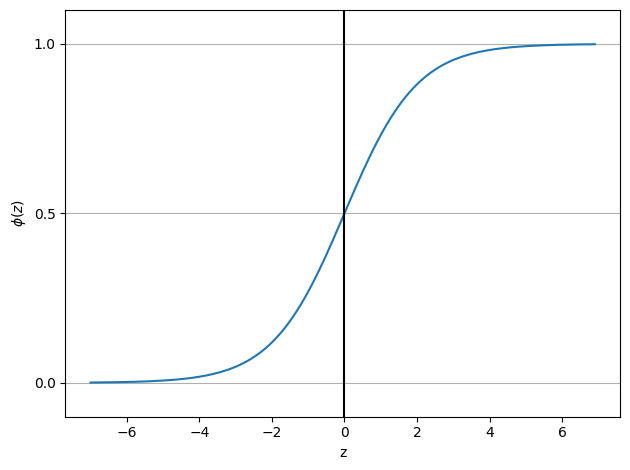

In [370]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

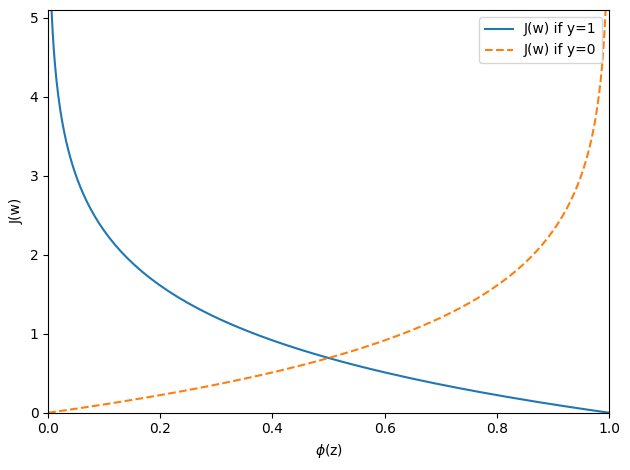

In [371]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

In [372]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)

lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, random_state=0)

In [373]:
y_test.shape

(412,)

In [374]:
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 8


In [375]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Confusion Matrix

The confusion matrix is a fundamental tool for evaluating the performance of classification models. It provides a clear and detailed breakdown of how well the model's predictions align with actual class labels.

## Basics of Confusion Matrix

- A confusion matrix is a table that presents the results of a classification problem.
- It consists of four values:
  - True Positive (TP): Correctly predicted positive instances.
  - True Negative (TN): Correctly predicted negative instances.
  - False Positive (FP): Incorrectly predicted positive instances (Type I error).
  - False Negative (FN): Incorrectly predicted negative instances (Type II error).

## Interpretation

- The confusion matrix helps understand the types of errors a model makes.
- Precision: TP / (TP + FP) - Measures the accuracy of positive predictions.
- Recall (Sensitivity or True Positive Rate): TP / (TP + FN) - Measures the ability to identify all positive instances.
- F1-score: 2 * (Precision * Recall) / (Precision + Recall) - A balanced measure of precision and recall.

## Use Cases

- The confusion matrix is used for various classification tasks:
  - Medical diagnoses: Detecting diseases based on test results.
  - Fraud detection: Identifying fraudulent transactions.
  - Image classification: Recognizing objects or patterns.

## Visualizing the Confusion Matrix

- Heatmaps and visualizations can enhance understanding of the confusion matrix.
- Libraries like `matplotlib` can help create informative visual representations.

## Conclusion

The confusion matrix is a vital tool to assess the performance of classification models. By analyzing TP, TN, FP, and FN, we can derive metrics that offer insights into the model's strengths and weaknesses.


[[224   8]
 [  0 180]]


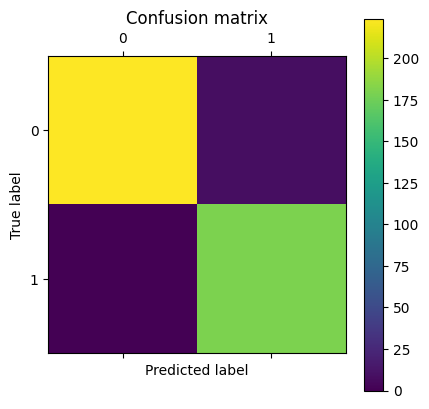

In [376]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Accuracy Score in Classification

Accuracy score is a metric that measures the proportion of correct predictions made by a classification model among all predictions.

- **Calculation**: Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
- **Interpretation**: High accuracy indicates well-aligned predictions with actual class labels.
- **Considerations**: Accuracy works best when classes are balanced, but can be misleading in imbalanced datasets.
- **Use Cases**: Commonly used to quickly assess overall model performance in classification tasks.

Accuracy score provides a straightforward evaluation of model predictions, but caution is needed when dealing with imbalanced data.


In [377]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [378]:
# Reshape the input from 1D to 2D
X_sample = X_test_std[0, :].reshape(1, -1)

# Now you can use predict_proba with the reshaped data
probs = lr.predict_proba(X_sample)

lr.predict_proba(X_test_std)


array([[3.56408585e-06, 9.99996436e-01],
       [1.00000000e+00, 3.07097017e-14],
       [4.84796803e-09, 9.99999995e-01],
       [1.00000000e+00, 2.41157432e-15],
       [1.00000000e+00, 1.07572565e-16],
       [1.00000000e+00, 1.27737277e-12],
       [1.00000000e+00, 5.11438231e-17],
       [1.00000000e+00, 4.23799190e-13],
       [1.85269843e-05, 9.99981473e-01],
       [1.30779329e-05, 9.99986922e-01],
       [1.00000000e+00, 1.84781368e-12],
       [1.00000000e+00, 2.09851513e-20],
       [2.39171255e-08, 9.99999976e-01],
       [1.00000000e+00, 6.01583132e-21],
       [1.00000000e+00, 1.27525048e-14],
       [1.00000000e+00, 1.38664168e-15],
       [1.08801856e-12, 1.00000000e+00],
       [1.17421938e-06, 9.99998826e-01],
       [1.00000000e+00, 2.22472210e-15],
       [1.00000000e+00, 1.00116944e-14],
       [3.57186684e-04, 9.99642813e-01],
       [9.99999751e-01, 2.49166182e-07],
       [1.00000000e+00, 3.29929624e-19],
       [1.75926481e-05, 9.99982407e-01],
       [9.424772

In [379]:
from sklearn.model_selection import cross_val_score

precisions = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='precision')
print('Precision', np.mean(precisions), precisions)

recalls = cross_val_score(lr, X_train_std, y_train, cv=5,scoring='recall')
print('Recalls', np.mean(recalls), recalls)

Precision 0.9887129724208377 [0.96629213 1.         0.97727273 1.         1.        ]
Recalls 0.9883720930232558 [1.         0.95348837 1.         1.         0.98837209]


In [380]:
f1s = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='f1')
print('F1', np.mean(f1s), f1s)

F1 0.9883410825915362 [0.98285714 0.97619048 0.98850575 1.         0.99415205]
